In [1]:
import numpy as np
import pathlib
import json
import pylab as plt
import seaborn as sns; sns.set()

In [13]:
data = []

with open('/private/home/kharitonov/work/EGG/egg/zoo/language_bottleneck/explain/redundancy_2.json', 'r') as fin:
    for line in fin:
        #print(line)
        data.append(json.loads(line))

In [14]:
data[0]

{'n_bits': 8,
 'bits_s': 8,
 'bits_r': 0,
 'n_examples_per_epoch': 2048000,
 'sender_hidden': 10,
 'receiver_hidden': 10,
 'temperature': 1.0,
 'sender_entropy_coeff': 0.01,
 'receiver_entropy_coeff': 0.01,
 'sender_lr': 0.001,
 'receiver_lr': 0.001,
 'mode': 'rf',
 'variable_length': True,
 'sender_cell': 'gru',
 'receiver_cell': 'lstm',
 'sender_emb': 10,
 'receiver_emb': 10,
 'early_stopping_thr': 0.99,
 'dump_language': False,
 'random_seed': 0,
 'checkpoint_dir': '/private/home/kharitonov/nest/guess_number/2019_08_27_04_12_35',
 'preemptable': True,
 'checkpoint_freq': 1,
 'validation_freq': 1,
 'n_epochs': 1000,
 'load_from_checkpoint': None,
 'no_cuda': False,
 'batch_size': 2048,
 'optimizer': 'adam',
 'lr': 0.001,
 'vocab_size': 8,
 'max_len': 21,
 'tensorboard': False,
 'tensorboard_dir': 'runs/',
 'cuda': True,
 'device': 'cuda',
 'min_positions': 10,
 'meaning_utt_info': 7.81441494138936,
 'mask': '??????????xxxxxxxxxxx',
 'reverse_info': 7.984375000000016,
 'name': '171286

In [15]:
filtered = []

for l in data:
    if l['receiver_cell'] != 'gru' or l['sender_cell'] != 'gru':
        continue
    filtered.append(l)
print(len(l))

41


In [44]:
xs = [11, 21, 31]
vocab_sizes = [8, 16]

results = dict((z, []) for z in vocab_sizes)

for vocab_size in vocab_sizes:
    for max_len in xs:
        slice = [x for x in filtered if x['max_len'] == max_len and x['vocab_size'] == vocab_size]
        min_positions = [x['min_positions'] / max_len for x in slice]
        
        
        results[vocab_size].append((np.mean(min_positions), np.std(min_positions) / np.sqrt(len(min_positions))))

In [34]:
results

{8: [(0.1818181818181818, 0.04285495643554833),
  (0.5357142857142857, 0.030929478706587105),
  (0.6387096774193548, 0.02490356008466939)],
 16: [(0.24242424242424243, 0.024742320634173507),
  (0.4761904761904761, 0.06734350297014738),
  (0.6612903225806451, 0.03325085181949726)]}

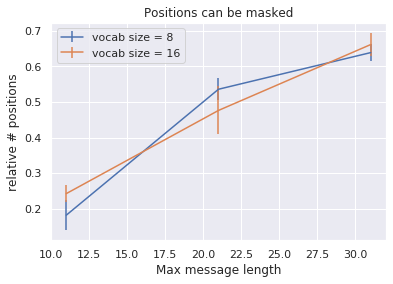

In [38]:
for vocab_size in vocab_sizes:
    means, std = [x[0] for x in results[vocab_size]], [x[1] for x in results[vocab_size]]
    
    plt.errorbar(xs, means, yerr=std, label=f'vocab size = {vocab_size}')
    
plt.ylabel('relative # positions')
plt.xlabel('Max message length')
plt.title("Positions can be masked")
plt.legend()

plt.savefig("gru_positions_can_mask.pdf")


plt.show()

In [40]:
xs = [11, 21, 31]
vocab_sizes = [8, 16]

results = dict((z, []) for z in vocab_sizes)

for vocab_size in vocab_sizes:
    for max_len in xs:
        slice = [x for x in filtered if x['max_len'] == max_len and x['vocab_size'] == vocab_size]
        reverse_info = [x['reverse_info'] for x in slice]
        
        
        results[vocab_size].append((np.mean(reverse_info), np.std(reverse_info) / np.sqrt(len(reverse_info))))

In [41]:
results

{8: [(2.0468941022993303, 0.9357030795014039),
  (7.716136796249714, 0.20781150307444032),
  (7.955851738277884, 0.02620756129758766)],
 16: [(4.424626587078848, 0.5625719258656376),
  (6.6821873176370215, 0.6162682306653183),
  (7.996093750000016, 0.0033829117335329633)]}

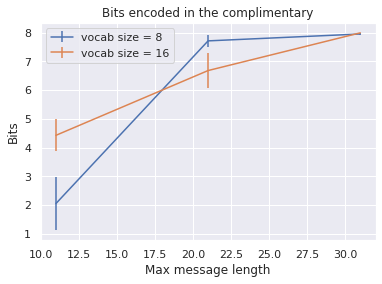

In [42]:
for vocab_size in vocab_sizes:
    means, std = [x[0] for x in results[vocab_size]], [x[1] for x in results[vocab_size]]
    
    plt.errorbar(xs, means, yerr=std, label=f'vocab size = {vocab_size}')
    
plt.ylabel('Bits')
plt.xlabel('Max message length')
plt.title("Bits encoded in the complimentary")
plt.legend()
plt.savefig("gru_bits_reverse.pdf")

plt.show()